In [1]:
%load_ext autoreload
%autoreload 2
from od.place import Place
import geopandas as gpd
import pandas as pd
import osmnx as ox

In [88]:
place_name = 'Dublin Region, Ireland'
city = Place(place_name)

Data found in db


In [50]:
city.load_all()

Data found in db
Data found in db
Data found in db


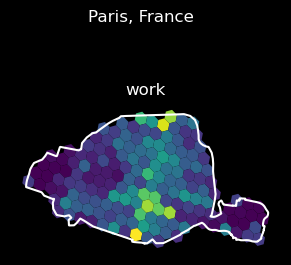

In [5]:
city.plot_zoning(['work'])#save_name='zoning'

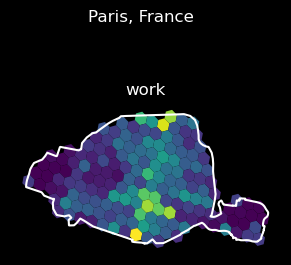

In [4]:
city.plot_zoning([i for i in city.zones.keys() if 'work' in i]+['work'])#, save_name='work_types')

## Folium

In [89]:
from visualization.plot.map import CityPlotter

In [90]:
plotter = CityPlotter(city, zoom=11)
plotter.add_hex_heatmap('population')
plotter.add_city_shape()
plotter.show_map()

Data found in db
Data found in db
Data found in db


/home/nicod/Documents/Codagon/upper-codagon/visualization/plot/map.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  c = self.city.shape.centroid


In [91]:
plotter.export_to_png(filename='dublin_region_population', tall_city=True)

In [ ]:
# bulk export
for col in city.data.drop(columns=['h3', 'geometry', 'nuts3']).columns:
    plotter = CityPlotter(city, zoom=11)
    plotter.add_hex_heatmap(col)
    plotter.add_city_shape()
    plotter.export_to_png(filename='dublin_region_'+col, tall_city=True)

## Roads from OSMnx

In [46]:
roads = ox.graph_from_place('Paris, France', network_type='drive', simplify=False, custom_filter='["highway"~"primary"]'
)

In [48]:
roads_gdf = ox.utils_graph.graph_to_gdfs(roads, nodes=False)

<Axes: >

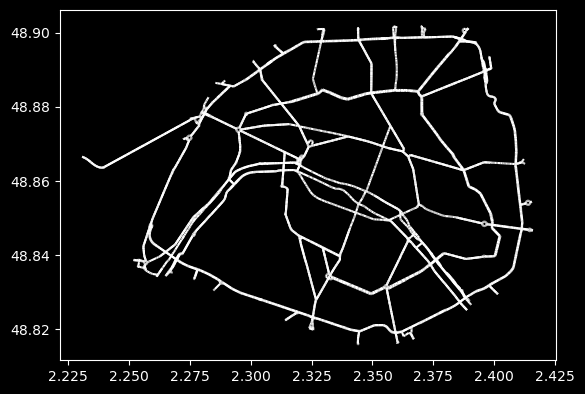

In [49]:
roads_gdf.plot()

/home/nicod/.local/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<Axes: >

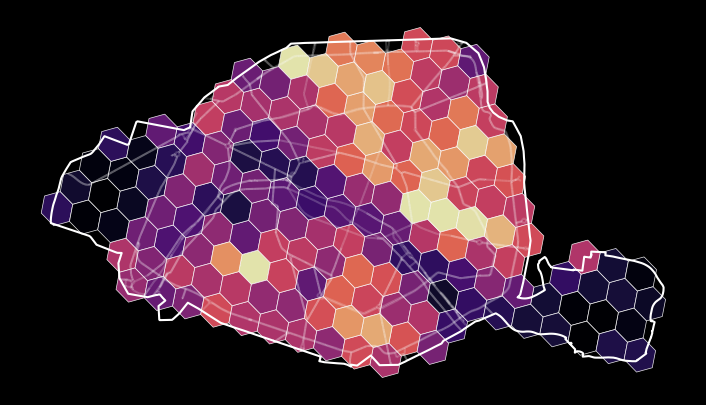

In [52]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
city.shape.boundary.plot(ax=ax, color='white', zorder=2)
ax.set_axis_off()
city.data.plot(ax=ax, zorder=0, column='population', alpha=0.9, edgecolor="#FFFFFF", linewidth =0.5, colormap='magma')
roads_gdf.plot(ax=ax, zorder=1, color='#FFFFFF33')